### imports

In [31]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32

### 1. Fetch data

In [21]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


csv_path = os.path.join('data')
all_files = os.listdir(csv_path)
csv_files = [f for f in all_files if f.count('rent') == 0]
df_list = []

for csv in csv_files:
    file_path = os.path.join(csv_path, csv)
    try:
        # Try reading the file using default UTF-8 encoding
        df = pd.read_csv(file_path)
        df_list.append(df)
    except Exception as e:
        print(f"Could not read file {csv}, error: {e}")

data = pd.concat(df_list, ignore_index=True)

print(f"Samples amount: {len(big_df)}")
data.head()

Samples amount: 134577


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


### 2. Analize raw data

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134577 entries, 0 to 134576
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    134577 non-null  object 
 1   city                  134577 non-null  object 
 2   type                  104834 non-null  object 
 3   squareMeters          134577 non-null  float64
 4   rooms                 134577 non-null  float64
 5   floor                 110315 non-null  float64
 6   floorCount            132816 non-null  float64
 7   buildYear             112014 non-null  float64
 8   latitude              134577 non-null  float64
 9   longitude             134577 non-null  float64
 10  centreDistance        134577 non-null  float64
 11  poiCount              134577 non-null  float64
 12  schoolDistance        134438 non-null  float64
 13  clinicDistance        134029 non-null  float64
 14  postOfficeDistance    134388 non-null  float64
 15  

In [23]:
data.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,134577.000000,134577.000000,110315.000000,132816.00000,112014.000000,134577.000000,134577.000000,134577.000000,134577.000000,134438.000000,134029.000000,134388.000000,134420.000000,134211.000000,130752.000000,134371.000000,1.345770e+05
mean,59.294263,2.699377,3.308236,5.25076,1985.492421,52.041489,19.464464,4.320654,20.722620,0.414438,0.970838,0.518832,0.372079,0.349352,1.440759,0.362435,7.659767e+05
std,21.655125,0.922813,2.509341,3.28065,34.196434,1.345714,1.789353,2.853911,24.462445,0.471919,0.893817,0.506330,0.455228,0.474532,1.103008,0.468975,3.974228e+05
min,25.000000,1.000000,1.000000,1.00000,1850.000000,49.978999,14.447127,0.020000,0.000000,0.002000,0.001000,0.001000,0.001000,0.001000,0.006000,0.001000,1.500000e+05
25%,44.540000,2.000000,2.000000,3.00000,1966.000000,51.111284,18.517530,1.970000,7.000000,0.175000,0.355000,0.239000,0.157000,0.114000,0.580000,0.143000,5.000000e+05
50%,55.200000,3.000000,3.000000,4.00000,1994.000000,52.195570,19.895814,3.930000,14.000000,0.291000,0.675000,0.393000,0.264000,0.230000,1.118000,0.240000,6.850000e+05
75%,69.500000,3.000000,4.000000,6.00000,2015.000000,52.436290,20.990740,6.120000,24.000000,0.469000,1.236000,0.624000,0.418000,0.411000,2.051000,0.407000,9.030000e+05
max,150.000000,6.000000,29.000000,29.00000,2024.000000,54.606460,23.207128,16.940000,212.000000,4.946000,4.999000,4.970000,4.961000,4.985000,5.000000,4.992000,3.250000e+06


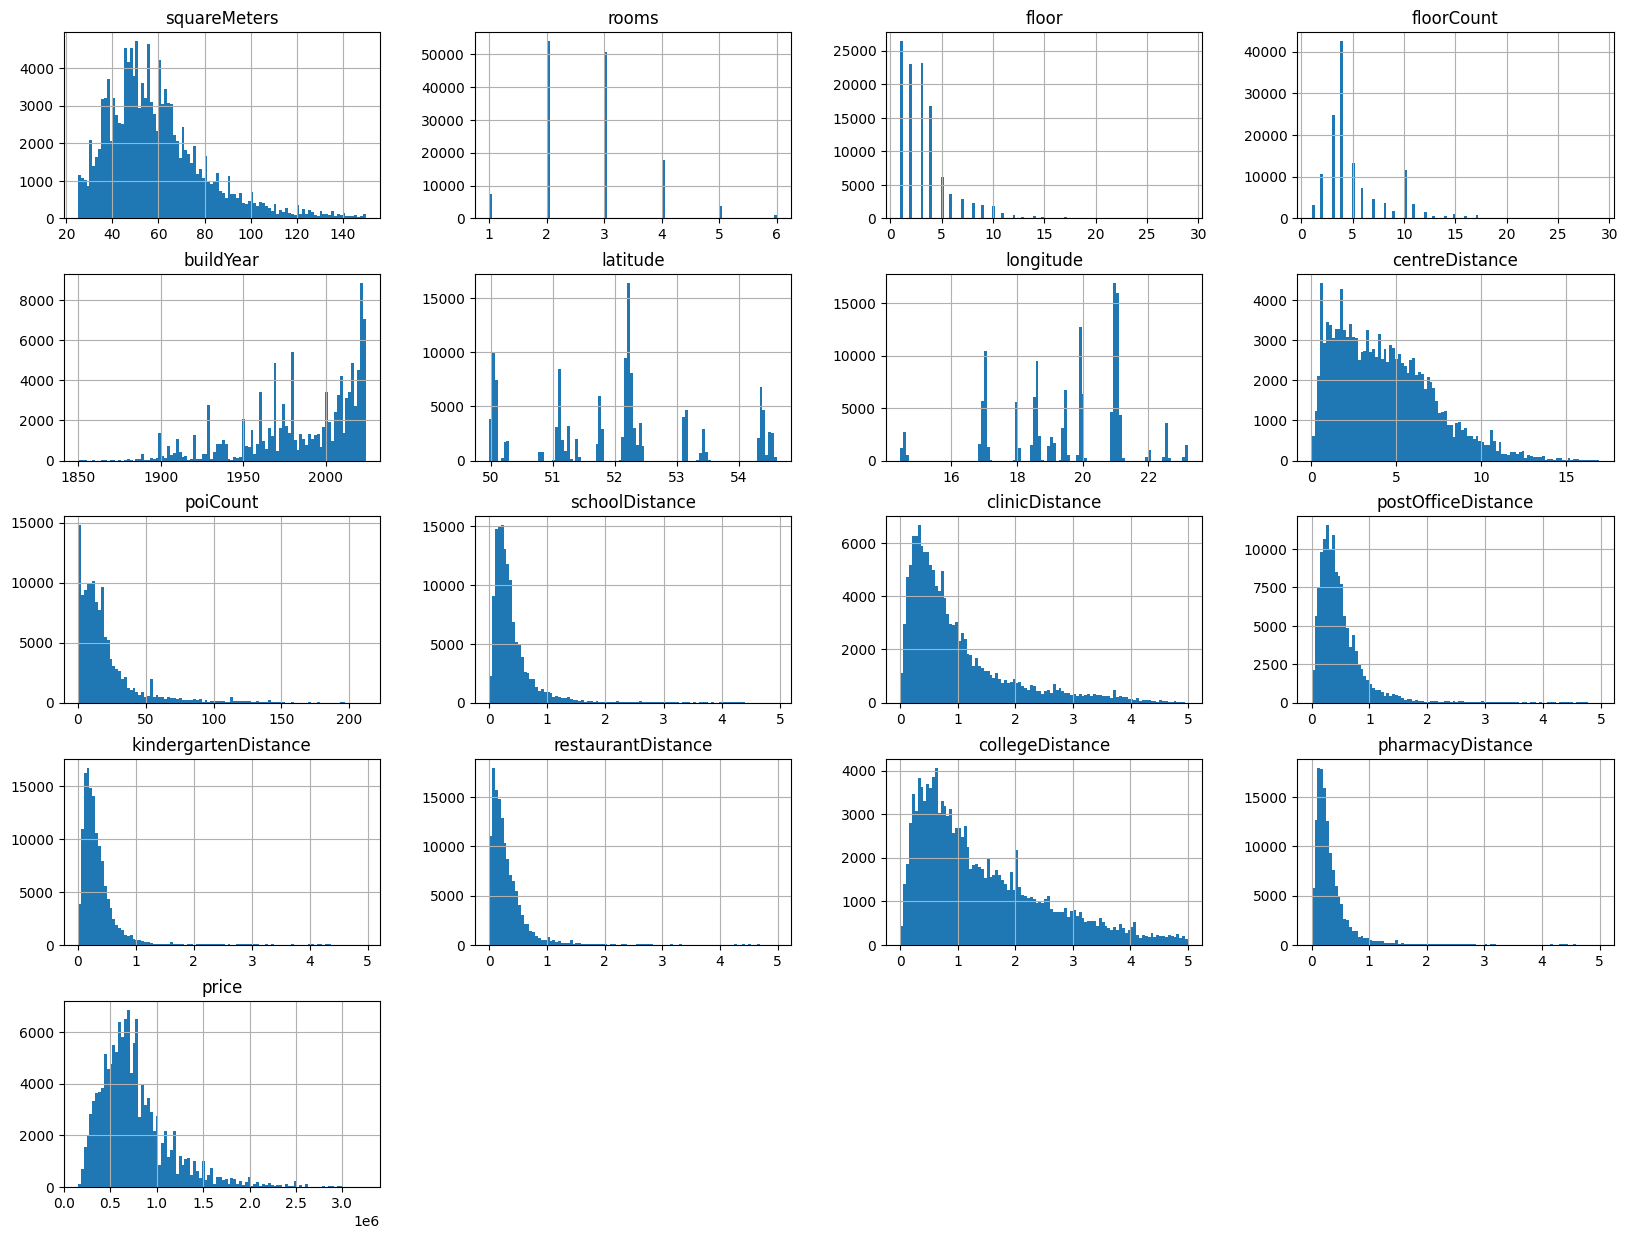

In [25]:
%matplotlib inline
data.hist(bins=100, figsize=(20,15))
plt.show()

### 3. Split and build data

In [30]:
ratio = 0.1 # 10% of amount is test data
shuffled = np.random.permutation(len(data))
test_set_size = int(len(data) * ratio)
test_indices = shuffled[:test_set_size]
train_indices = shuffled[test_set_size:]
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]
print(f"Training set amount: {len(train_data)}\nTest set amount: {len(test_data)}")

Training set amount: 121120
Test set amount: 13457


In [ ]:
data = data.reset_index()

def test_set_check(id, ratio):
    return crc32(np.int64(id)) & 0xffffffff < ratio * 2**32
ids = data["index"]
test_set = ids.apply(lambda id_: test_set_check(id_, ratio))
train_data = data.loc[~test_set]
test_data = data.loc[test_set]